In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import io

In [2]:
# Load the Data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the CSV data into a Pandas DataFrame
    Data = pd.read_csv(io.StringIO(response.text))
    # Now you can work with the DataFrame 'df'
else:
    print(f"HTTP GET request failed with status code: {response.status_code}")


In [3]:
Data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
len(Data["Serial"].value_counts().tolist())

53

In [5]:
Data["ReusedCount"].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

In [6]:
# 11 orbites
Data["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [7]:
# 3 launch site
Data["LaunchSite"].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [8]:
Data["Outcome"].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [9]:
# 6 type Flights
Data["Flights"].value_counts()

1    53
2    19
3     8
4     6
5     2
6     2
Name: Flights, dtype: int64

In [10]:
Data["Block"].value_counts()

5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64

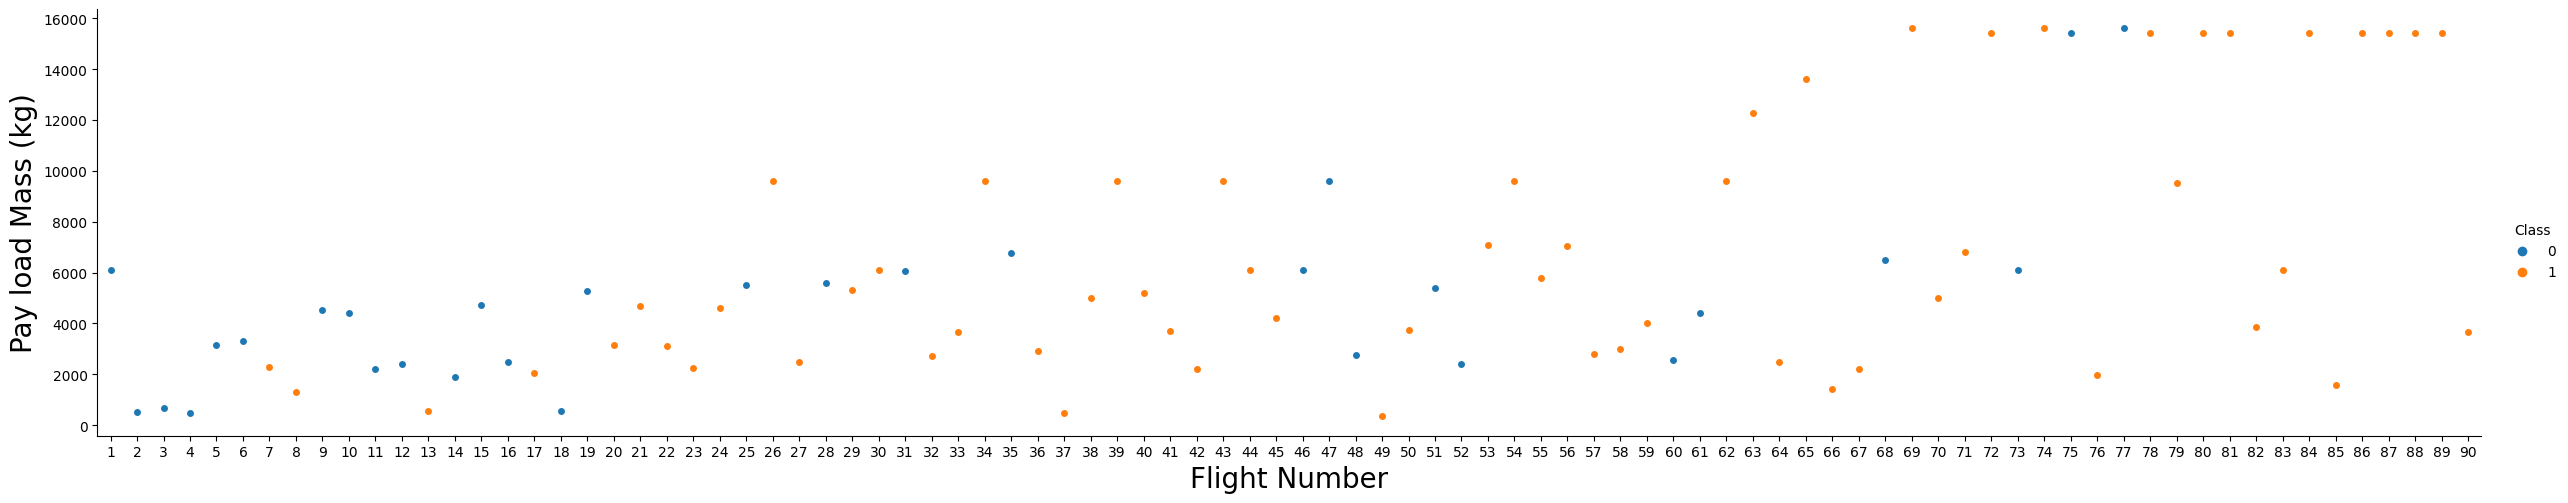

In [11]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=Data, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

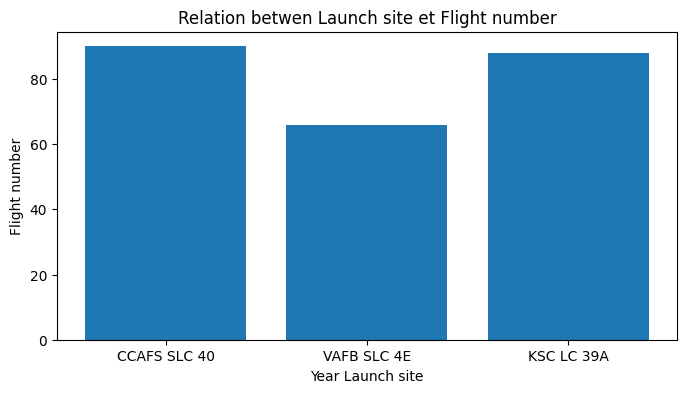

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(Data['LaunchSite'], Data['FlightNumber'], data=Data)
ax.set_title('Relation betwen Launch site et Flight number')
ax.set_ylabel('Flight number')
ax.set_xlabel('Year Launch site')

plt.show()



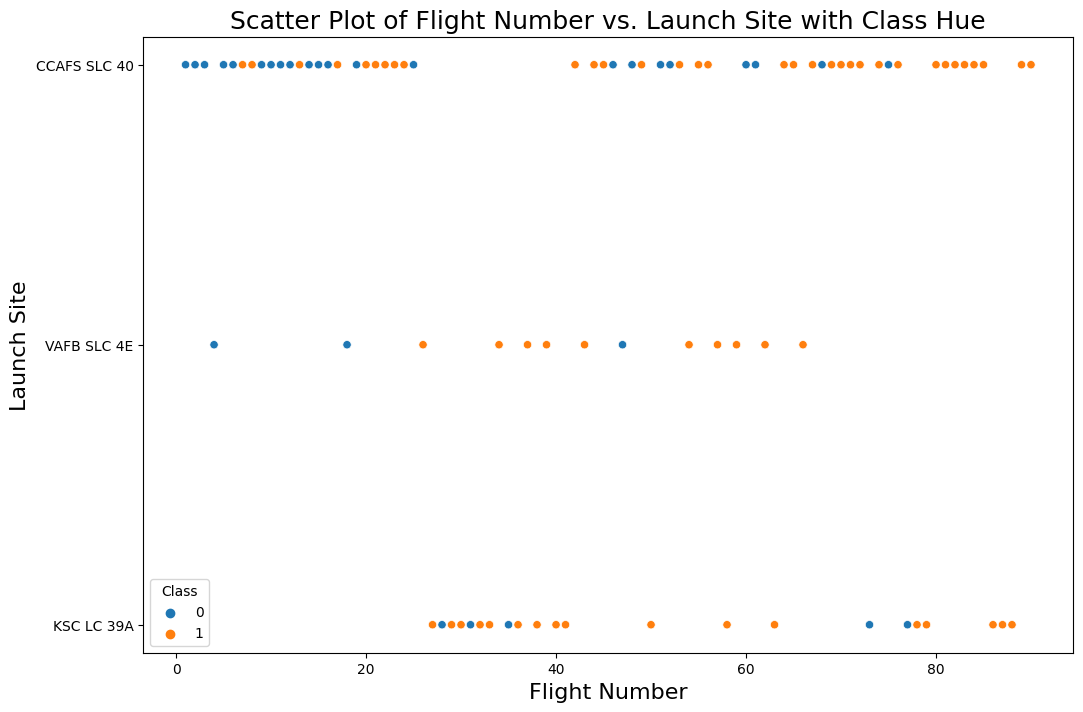

In [13]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=Data)
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Launch Site', fontsize=16)

plt.title('Scatter Plot of Flight Number vs. Launch Site with Class Hue', fontsize=18)

plt.show()


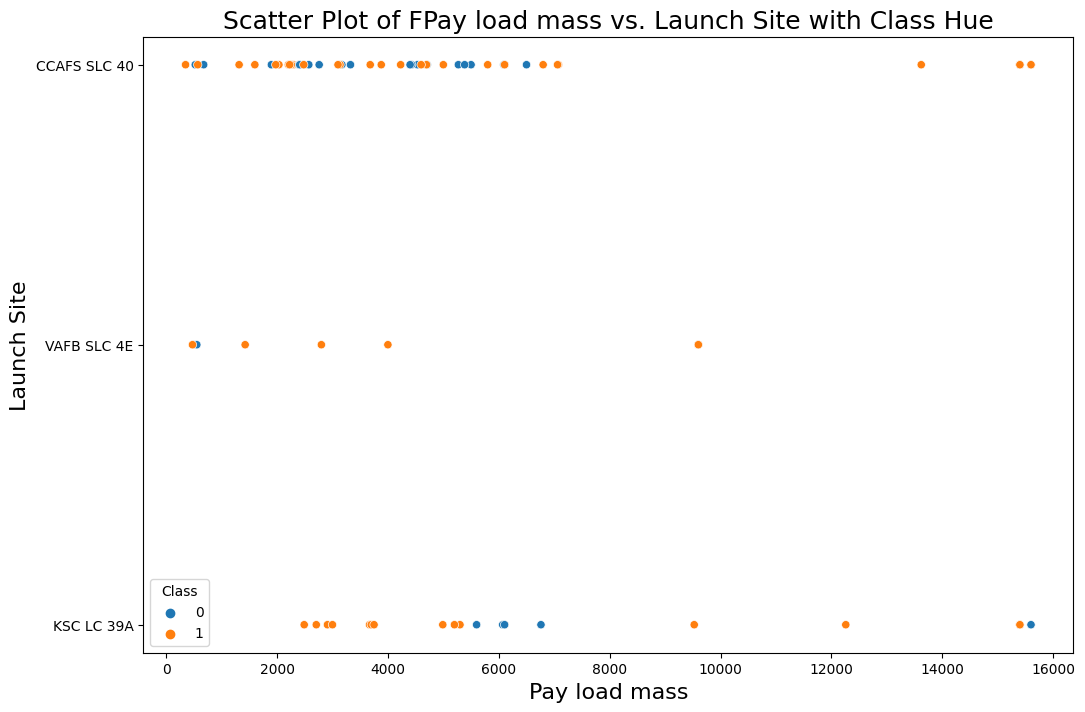

In [14]:

plt.figure(figsize=(12, 8))

sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=Data)
plt.xlabel('Pay load mass', fontsize=16)
plt.ylabel('Launch Site', fontsize=16)

plt.title('Scatter Plot of FPay load mass vs. Launch Site with Class Hue', fontsize=18)

plt.show()

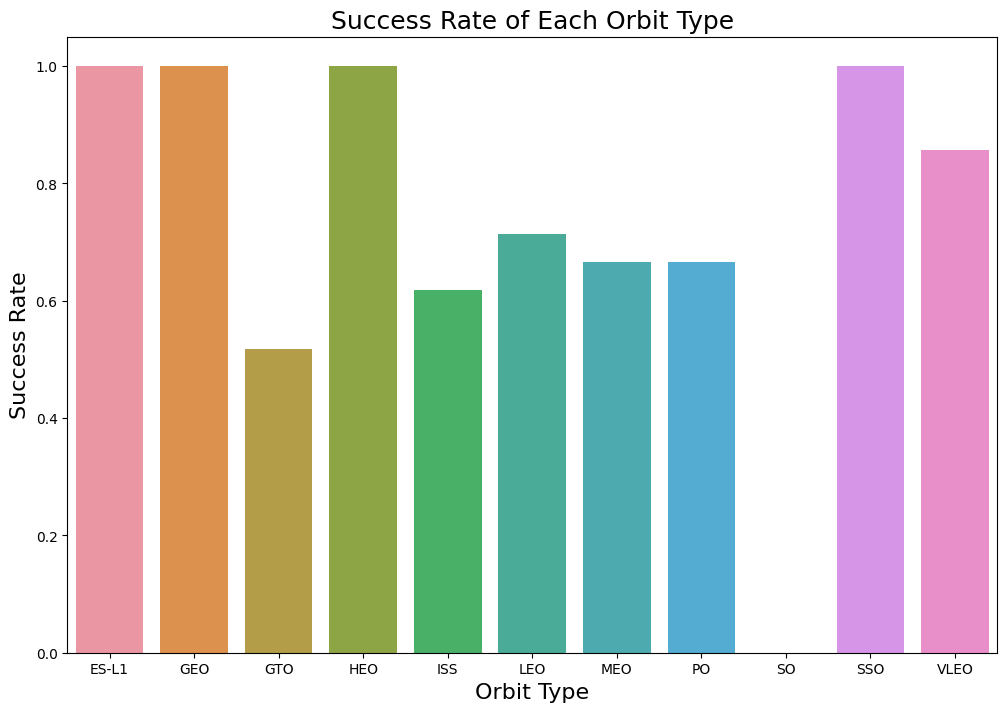

In [15]:
orbit_success_rate = Data.groupby('Orbit')['Class'].mean().reset_index()


plt.figure(figsize=(12, 8))

sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel('Orbit Type', fontsize=16)
plt.ylabel('Success Rate', fontsize=16)
plt.title('Success Rate of Each Orbit Type', fontsize=18)

plt.show()


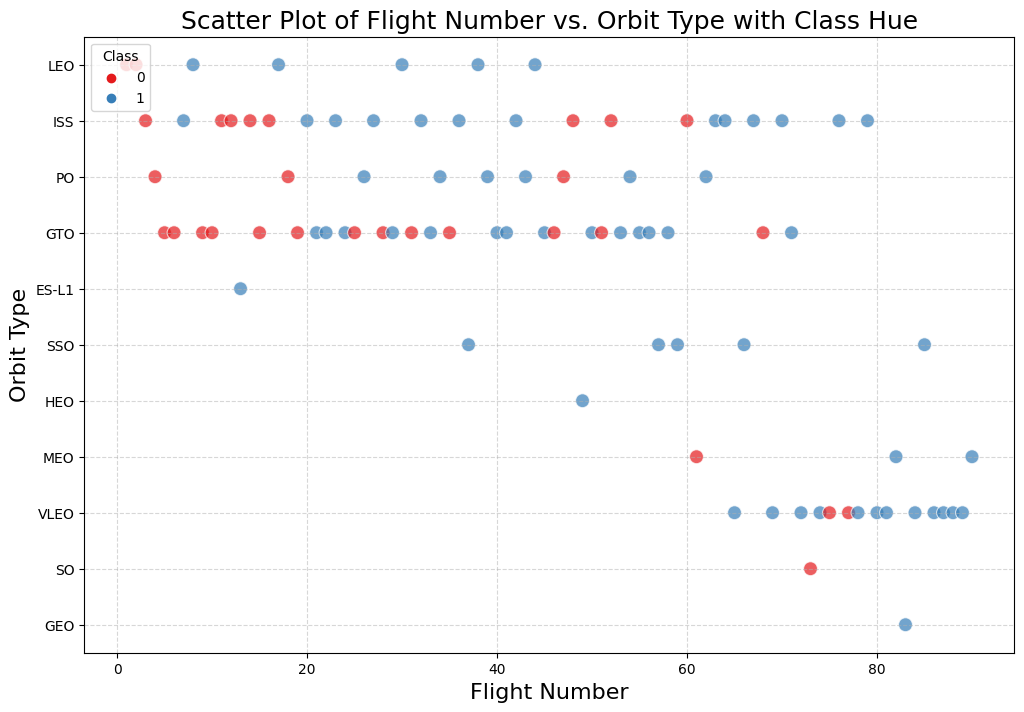

In [16]:
plt.figure(figsize=(12, 8))


sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=Data, palette='Set1', alpha=0.7, s=100)

plt.legend(loc='upper left', title='Class')

plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Orbit Type', fontsize=16)


plt.title('Scatter Plot of Flight Number vs. Orbit Type with Class Hue', fontsize=18)


plt.grid(True, linestyle='--', alpha=0.5)


plt.show()


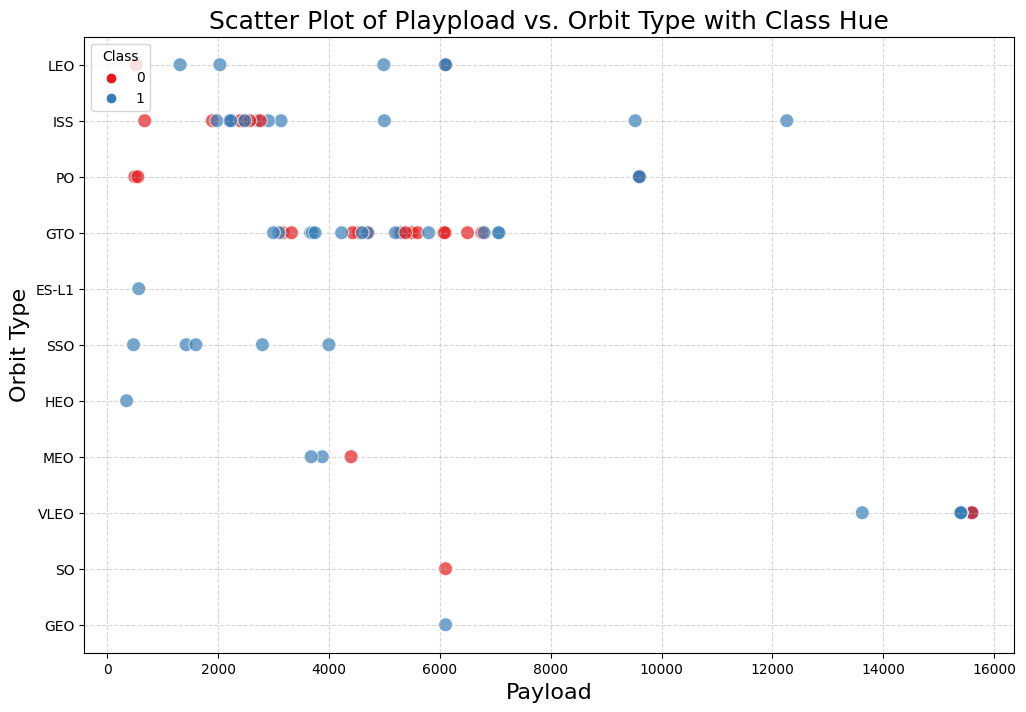

In [17]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=Data, palette='Set1', alpha=0.7, s=100)
plt.legend(loc='upper left', title='Class')
plt.xlabel('Payload', fontsize=16)
plt.ylabel('Orbit Type', fontsize=16)
plt.title('Scatter Plot of Playpload vs. Orbit Type with Class Hue', fontsize=18)


plt.grid(True, linestyle='--', alpha=0.5)


plt.show()

In [18]:
year=[]
def Extract_year():
    for i in Data["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
Data['Date'] = year
Data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


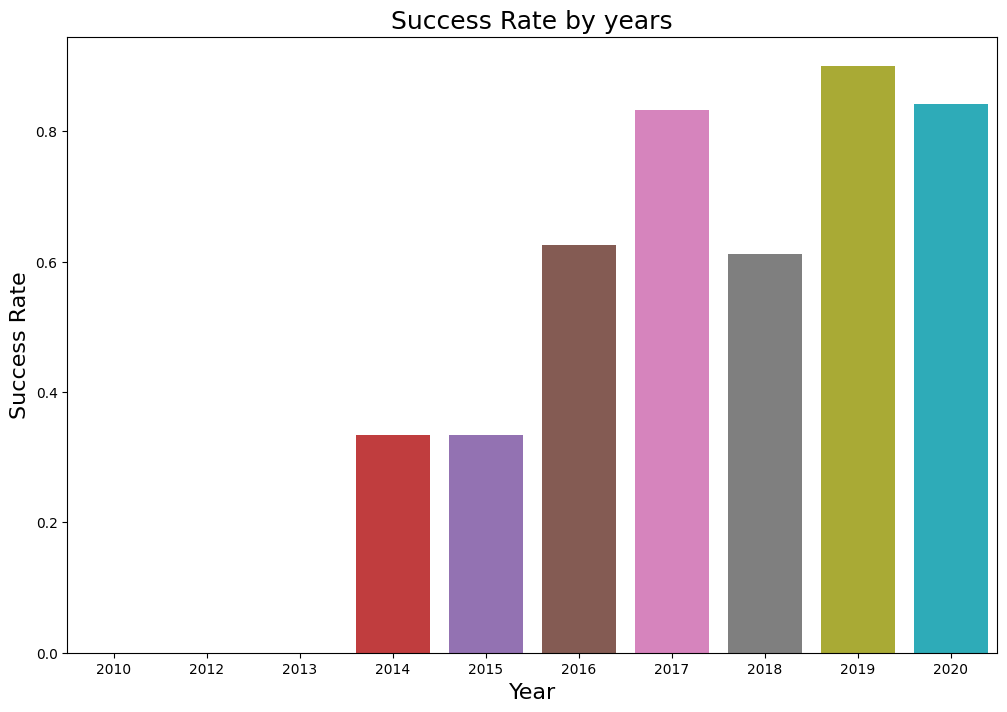

In [19]:
success_rate_by_year = Data.groupby('Date')['Class'].mean().reset_index()


plt.figure(figsize=(12, 8))

sns.barplot(x='Date', y='Class', data=success_rate_by_year)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Success Rate', fontsize=16)
plt.title('Success Rate by years', fontsize=18)

plt.show()

## We observe that the sucess rate since 2013 kept increasing till 2020

In [20]:
features = Data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [21]:
features_one_hot = pd.get_dummies(features)

In [22]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
print(features.shape)

(90, 12)


In [24]:
print(features_one_hot.shape)

(90, 80)


In [25]:
features_one_hot = features_one_hot.astype('float64')

In [26]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [27]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)